https://github.com/sadhana1002/PredictingSalaryClass-Classification/blob/master/Classification.ipynb

# Classification - Predict Salary Group

## Dataset
https://archive.ics.uci.edu/ml/datasets/Adult

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.



## Attribute Information:
Listing of attributes:
Labels : >50K, <=50K.

age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
adults = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
adults_test = pd.read_csv('adult.csv',names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])

In [ ]:
train_data = adults.drop('label',axis=1)

test_data = adults_test.drop('label',axis=1)

data = train_data.append(test_data)
data.head()


,Age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
label = adults['label'].append(adults_test['label'])
label.head()



0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: label, dtype: object

In [ ]:
full_dataset = adults.append(adults_test)

data_binary = pd.get_dummies(data)
data_binary.head()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_binary,label)

performance = []



# Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

# Binary data
GNB.fit(x_train,y_train)
train_score = GNB.score(x_train,y_train)
test_score = GNB.score(x_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.7971171761429946 - Test score - 0.7923346231803943


# Logistic Regression

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression


logClassifier = LogisticRegression()

logClassifier.fit(x_train,y_train)
train_score = logClassifier.score(x_train,y_train)
test_score = logClassifier.score(x_test,y_test)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

LogisticRegression : Training score - 0.79965602669888 - Test score - 0.7928259934893435


# KNN

KNN : Training score - 1.0 -- Test score - 0.9286284626251459
KNN : Training score - 0.9478511905980631 -- Test score - 0.7750138197899392
KNN : Training score - 0.8640895968551012 -- Test score - 0.8132792825993489
KNN : Training score - 0.848754120513503 -- Test score - 0.7881579755543271
KNN : Training score - 0.8321901680964763 -- Test score - 0.7992752287943001
KNN : Training score - 0.8259249401117913 -- Test score - 0.7935016276641484
KNN : Training score - 0.8201715771585348 -- Test score - 0.7960199004975125
KNN : Training score - 0.816404250527221 -- Test score - 0.7946686321479025
KNN : Training score - 0.8140701459839069 -- Test score - 0.7957742153430379
KNN : Training score - 0.8121455334657357 -- Test score - 0.7963884282292243


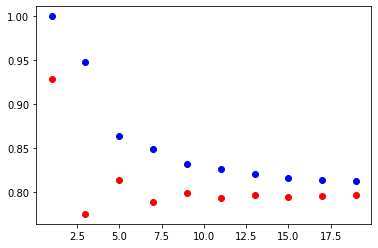

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []

train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    train_score = knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

knn.score(x_train,y_train)

train_score = knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})


K Neighbors : Training score - 0.8640895968551012 - Test score - 0.8132792825993489


In [ ]:

performance

[{'algorithm': 'Gaussian Naive Bayes',
  'testing_score': 0.7923346231803943,
  'training_score': 0.7971171761429946},
 {'algorithm': 'LogisticRegression',
  'testing_score': 0.7928259934893435,
  'training_score': 0.79965602669888},
 {'algorithm': 'K Neighbors',
  'testing_score': 0.8132792825993489,
  'training_score': 0.8640895968551012}]

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rndTree = RandomForestClassifier()

rndTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rndTree.score(x_test,y_test)

0.9595233708003194

In [ ]:
rndTree.score(x_train,y_train)

0.9999795253987429